In [18]:
import pandas as pd
import numpy as np

# **Steps**

## 0.  Preprocess + EDA + Feature Selection
## 1.  Extract input and output columns
## 2.  Scale the values
## 3.  Train test split
## 4.  Train the model
## 5.  Evaluate the model
## 6.  Deploy the model

In [19]:
df = pd.read_csv('/content/placement.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   --         100 non-null    object 
 1   cgpa       100 non-null    float64
 2   iq         100 non-null    int64  
 3   placement  100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [20]:
df.head()

,--,cgpa,iq,placement
0,--,6.87,142,0
1,--,9.75,131,1
2,--,8.66,83,0
3,--,7.99,102,0
4,--,5.78,94,0


**Preprocesse**

In [21]:
df = df.iloc[:, 1:]


In [22]:
df.head()

,cgpa,iq,placement
0,6.87,142,0
1,9.75,131,1
2,8.66,83,0
3,7.99,102,0
4,5.78,94,0


In [23]:
import matplotlib.pyplot as plt


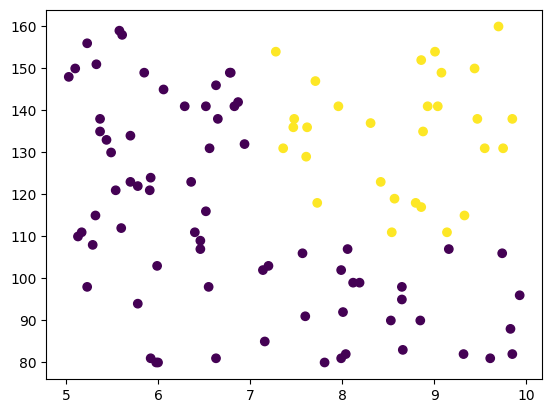

In [27]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement'])

In [31]:
x = df.iloc[:, 0 : 2]
y = df.iloc[:, -1]

In [32]:
x,y

(    cgpa   iq
 0   6.87  142
 1   9.75  131
 2   8.66   83
 3   7.99  102
 4   5.78   94
 ..   ...  ...
 95  7.47  136
 96  7.61  129
 97  7.14  102
 98  5.13  110
 99  5.54  121
 
 [100 rows x 2 columns],
 0     0
 1     1
 2     0
 3     0
 4     0
      ..
 95    1
 96    1
 97    0
 98    0
 99    0
 Name: placement, Length: 100, dtype: int64)

In [33]:
from sklearn.model_selection import train_test_split



In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1)

In [36]:
print("For Training")
print(x_train)
print(y_train)

print("For Testing")
print(x_test)
print(y_test)

For Training
    cgpa   iq
44  6.29  141
15  5.92  124
24  7.28  154
31  5.85  149
38  8.42  123
..   ...  ...
16  6.52  141
40  5.61  158
59  6.63   81
50  9.85   82
1   9.75  131

[90 rows x 2 columns]
44    0
15    0
24    1
31    0
38    1
     ..
16    0
40    0
59    0
50    0
1     1
Name: placement, Length: 90, dtype: int64
For Testing
    cgpa   iq
88  9.44  150
49  5.92   81
55  9.61   81
3   7.99  102
39  7.20  103
94  8.85   90
11  9.85  138
67  9.01  154
60  6.94  132
84  6.55   98
88    1
49    0
55    0
3     0
39    0
94    0
11    1
67    1
60    0
84    0
Name: placement, dtype: int64


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **Logistic Regression**

In [40]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [41]:
# model training
clf.fit(x_train, y_train)

LogisticRegression()

In [44]:
y_pred = clf.predict(x_test)

In [43]:
y_test

,placement
88,1
49,0
55,0
3,0
39,0
94,0
11,1
67,1
60,0
84,0


In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [46]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

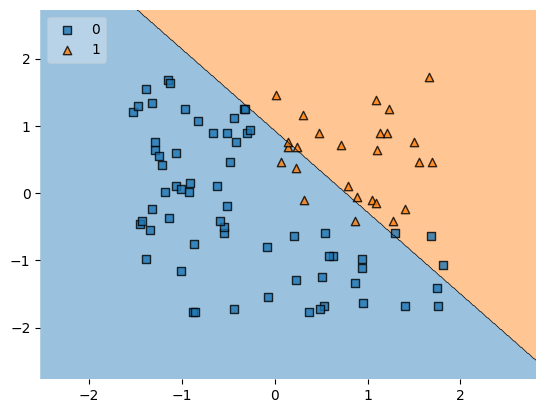

In [50]:
plot_decision_regions(x_train, y_train.values, clf = clf, legend = 2)

In [51]:
import pickle